## Script to test a neural network

This script test a neural net

In [1]:
import numpy as np
import os
from os.path import join,isdir
from neuralsw.model.modeltools import loadmymodel
import glob
import matplotlib.pyplot as plt

/usr/home/jbrlod/data/anaconda2/envs/keras/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
# Initialize parameters
PLOT = True
SAVE = True #to save plots
#rootdir
rootdir = os.path.realpath(\
	os.path.join(os.getcwd(),'../..'))

#directory to store the data
datadir = os.path.realpath(os.path.join(rootdir,'data'))

#Test directory
#testdir = 'train_uparam_nonoise_std'
testdir = 'test_uparam_nonoise_std'
#testdir = 'test_uparam_nonoise_windvar'
#testdir = 'test_uparam_nonoise_warsmooth'
#testdir = 'test_vparam_nonoise_std'
#testdir = 'test_vparam_nonoise_windvar'
#testdir = 'test_vparam_nonoise_warsmooth'


#files containing inputs/outputs
Xfile = join(datadir,testdir,'data_X.npy')
yfile = join(datadir,testdir,'data_y.npy')

#input name
netname = 'nn0_uparam_nonoise_std'
#netname = 'nn0_uparam_noise01_std'
#netname = 'nn0_vparam_nonoise_std'
#netname = 'nn0_vparam_noise01_std'
print('Name of the neural net:',netname)


Name of the neural net: nn0_uparam_nonoise_std


In [7]:
## Load the nn model
pklfile=glob.glob(join(datadir,netname,'*.pkl'))[0]
nn = loadmymodel(pklfile)

In [8]:
## Load the data
X_test = np.load(Xfile)
y_test = np.load(yfile)

#predict
y_predict = nn.predict(X_test)

X_test.shape


(120, 80, 80, 3)

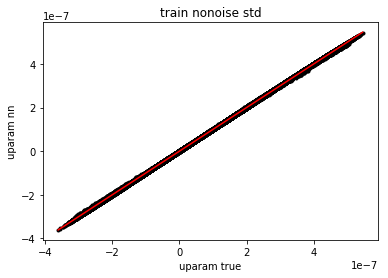

correlation= 1.000


In [6]:
## Plots and save
if PLOT:
    #definie type of dataset
    tkeywords = testdir.split('_')
    dtype = ' '.join([tkeywords[i] for i in [0,-2,-1]])
    param = tkeywords[1]
    mini = min(y_test.ravel())
    maxi = max(y_test.ravel())

    #scatter plot
    plt.plot(y_test.ravel(),y_predict.ravel(),'.k')
    plt.plot([mini,maxi],[mini,maxi],'r-')
    plt.xlabel(param + ' true')
    plt.ylabel(param + ' nn')
    plt.title(dtype)
    if SAVE:
        plt.savefig(join(datadir,netname,'scatter_' + testdir + '.png'))
    plt.show()
    
#corrcoef
scor = '{0:3.3f}'.format(np.corrcoef(y_test.ravel(),y_predict.ravel())[0,1])
print('correlation=',scor)
if SAVE:
    with open(join(datadir,netname,'corrcoef_' + testdir + '.txt'),'w') as f:
        f.write(scor)

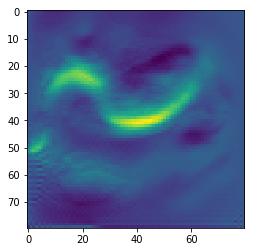

In [15]:
plt.imshow(X_test[10,:,:,2].squeeze())
plt.show()